Лабораторная работа №8


In [3]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib import pylab as plt

# 1. Загрузите данные ex8data1.mat из файла.

mat = loadmat('ex8data1.mat')

X = pd.DataFrame(mat['X'])
Xval = pd.DataFrame(mat['Xval'])
Yval = pd.DataFrame(mat['yval'])

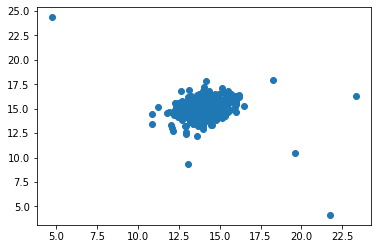

In [57]:
# 2. Постройте график загруженных данных в виде диаграммы рассеяния.

plt.scatter(X[0], X[1])
plt.show()


In [7]:
# 3. Представьте данные в виде двух независимых нормально распределенных случайных величин.

m = X.mean()
sigma = np.sqrt(((X - m)**2).mean())

def normal_distribution(x, m, sigma):
    return np.exp(-1 * (x - m)**2 / (2 * sigma**2))/(np.sqrt(2 * np.pi) * sigma)

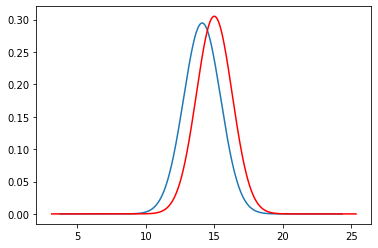

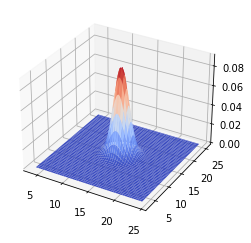

In [59]:
# 4. Оцените параметры распределений случайных величин.

x0, x1 = np.meshgrid(np.arange(X[0].min() - 1, X[0].max() + 1, 0.01), np.arange(X[1].min() - 1, X[1].max() + 1, 0.01))
z = normal_distribution(np.vstack([x0.flatten(), x1.flatten()]).T, m.to_numpy(), sigma.to_numpy())

x0z = np.vstack([x0.flatten(), z[:, 0]]).T
x0z = x0z[x0z[:, 0].argsort()]
x1z = np.vstack([x1.flatten(), z[:, 1]]).T
x1z = x1z[x1z[:, 0].argsort()]
plt.plot(x0z[:, 0], x0z[:, 1])
plt.plot(x1z[:, 0], x1z[:, 1], c = "r")
plt.show()

plt.figure()\
    .add_subplot(111, projection="3d")\
    .plot_surface(x0, x1, z.prod(axis=1).reshape(x0.shape), cmap="coolwarm")

plt.show()



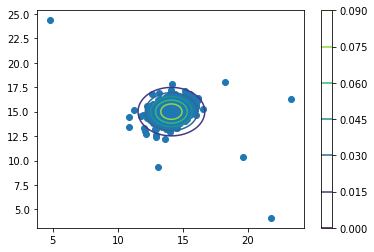

In [60]:
#5. Постройте график плотности распределения получившейся случайной величины в виде изолиний, совместив его с графиком из пункта 2.

fig,ax=plt.subplots()
cp = ax.contour(x0, x1, z.prod(axis=1).reshape(x0.shape))
fig.colorbar(cp)
plt.scatter(X[0], X[1])
plt.show()

In [8]:
# 6. Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

def calculate_f1(epsilon, values):
    tp = len(values[(values[:, 0] < epsilon) & (values[:, 1] == 1)])
    fp = len(values[(values[:, 0] < epsilon) & (values[:, 1] == 0)])
    fn = len(values[(values[:, 0] >= epsilon) & (values[:, 1] == 1)])
    return tp/(tp + 0.5 * (fp + fn))

best_f1 = None
best_epsilon = None

normal_distr_result = normal_distribution(Xval.to_numpy(), m.to_numpy(), sigma.to_numpy()).prod(axis=1)
values = np.vstack([normal_distr_result.reshape(Yval.T.shape), Yval.to_numpy().T]).T

for epsilon in np.arange(normal_distr_result.min(), normal_distr_result.max(), 0.00001):
    f1 = calculate_f1(epsilon, values)

    if best_f1 is None or best_f1 < f1:
        best_f1 = f1
        best_epsilon = epsilon


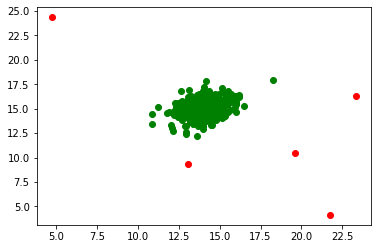

In [62]:
# 7. Выделите аномальные наблюдения на графике из пункта 5 с учетом выбранного порогового значения.

normal_distr_result = normal_distribution(X.to_numpy(), m.to_numpy(), sigma.to_numpy()).prod(axis=1)
x = X.copy()
x.insert(2,2,normal_distr_result)
x = x.to_numpy()

correct = x[x[:, -1] >= best_epsilon]
wrong = x[x[:, -1] < best_epsilon]

plt.scatter(correct[:, 0], correct[:, 1], c="g")
plt.scatter(wrong[:, 0], wrong[:, 1], c="r")
plt.show()

In [11]:
# 8. Загрузите данные ex8data2.mat из файла.

mat = loadmat('ex8data2.mat')

X = pd.DataFrame(mat['X'])
Xval = pd.DataFrame(mat['Xval'])
Yval = pd.DataFrame(mat['yval'])

In [12]:
# 9. Представьте данные в виде 11-мерной нормально распределенной случайной величины.

m = X.mean()
cov = np.cov(X.T)
sigma = np.sqrt(((X - m)**2).mean())

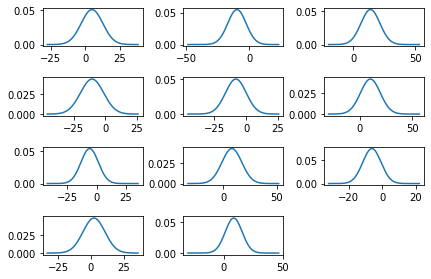

In [13]:
# 10. Оцените параметры распределения случайной величины.

arrays = []
for i in range(len(X.columns)):
    step = (abs(X[i].min() - 10) + abs(X[i].max() + 10)) / 1000
    arrays.append(np.arange(X[i].min() - 10, X[i].max() + 10, step)[:999])

z = normal_distribution(np.vstack(arrays).T, m.to_numpy(), sigma.to_numpy())

fig, axs = plt.subplots(4, 3)
fig.tight_layout(pad=1.0)
for i, x in enumerate(arrays):
    xz = np.vstack([x.flatten(), z[:, i]]).T
    xz = xz[xz[:, 0].argsort()]
    axs[i // 3, i % 3].plot(xz[:, 0], xz[:, 1])

plt.axis('off')
plt.show()


In [25]:
#11. Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

def normal_distribution(x, m, cov):
    return np.exp(-0.5 * np.sum((x - m) @ np.linalg.inv(cov) * (x - m), axis=1)) / ((2 * np.pi)**(len(m)/2) * np.sqrt(np.linalg.det(cov)))

best_f1 = None
best_epsilon = None

normal_distr_result = normal_distribution(Xval.to_numpy(), m.to_numpy(), cov)
values = np.vstack([normal_distr_result.reshape(Yval.T.shape), Yval.to_numpy().T]).T

for epsilon in np.arange(normal_distr_result.min(), normal_distr_result.max(), 1e-21):
    f1 = calculate_f1(epsilon, values)

    if best_f1 is None or best_f1 < f1:
        best_f1 = f1
        best_epsilon = epsilon

In [27]:
# 12. Выделите аномальные наблюдения в обучающей выборке. Сколько их было обнаружено? Какой был подобран порог?

normal_distr_result = normal_distribution(X.to_numpy(), m.to_numpy(), cov)
x = X.copy()
x.insert(11, 11, normal_distr_result)
x = x.to_numpy()

wrong = x[x[:, -1] < best_epsilon]
print(f"Колличество аномалий: {len(wrong)}. Порог: {best_epsilon}")


Колличество аномалий: 7. Порог: 2.0000022773681813e-21
